In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [56]:
# loading the data set to the pandas dataframe
data = pd.read_csv('Creditcard.csv')

In [57]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [60]:
data.shape

(284807, 31)

In [61]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [62]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [63]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# This dataset is highly imbalanced
        0-->Normal transaction
        1-->Fraud transaction

In [64]:
# separating the data for analysis
legit =data[data.Class == 0]
fraud = data[data.Class == 1]

In [65]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [66]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [67]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [68]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# under-sampling

# Build a sample dataset containing similar distribution of Normal Transactions and fraudalent Transactions

In [69]:
legit_sample = legit.sample(n=492)

In [70]:
#concatenating two DataFrames
new_data = pd.concat([legit_sample,fraud],axis=0)

In [71]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
182554,125450.0,1.903077,-0.756739,-0.081716,0.265245,-0.944522,0.244887,-1.160845,0.415389,1.425010,...,0.049568,0.087334,0.375455,0.657025,-0.691698,0.305492,-0.028650,-0.042866,20.80,0
35308,38059.0,0.200031,-2.171243,1.151987,0.803591,-1.624029,1.625333,-0.848241,0.608011,1.636571,...,0.216993,0.159319,-0.346410,-0.164647,-0.090416,1.107493,-0.050334,0.073305,434.43,0
154882,103497.0,2.128481,-0.477188,-1.006067,-1.406533,-0.097386,-0.356604,-0.447053,-0.198014,3.385786,...,-0.590218,-1.162491,0.366103,0.020232,-0.280760,-0.681673,-0.003963,-0.046677,2.47,0
260467,159572.0,1.104492,-2.296569,-3.509637,-0.175397,0.216251,-0.744990,1.421337,-0.780725,-1.330096,...,0.232376,-0.101795,-0.712620,0.162080,0.422286,0.959702,-0.240590,0.018963,637.97,0
185419,126655.0,2.077276,-0.332974,-0.778772,-0.136740,-0.112216,-0.003446,-0.554928,-0.039464,1.189891,...,0.158769,0.658751,0.098643,0.143537,-0.066143,0.095585,0.010107,-0.040009,2.87,0


In [72]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [73]:
new_data.to_csv('cleaned data.csv')

In [74]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [75]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92435.004065,0.152364,0.123930,0.061753,0.000145,-0.056439,-0.021722,-0.068759,-0.015034,0.001978,...,0.009969,-0.033318,-0.038951,-0.028853,-0.007277,0.015596,0.005228,-0.019463,0.003436,70.849939
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [76]:
X = new_data.drop(columns=['Class','Time','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], axis=1)
Y = new_data['Class']

In [77]:
print(X)
print(Y)

              V1        V2        V3        V4        V5  Amount
182554  1.903077 -0.756739 -0.081716  0.265245 -0.944522   20.80
35308   0.200031 -2.171243  1.151987  0.803591 -1.624029  434.43
154882  2.128481 -0.477188 -1.006067 -1.406533 -0.097386    2.47
260467  1.104492 -2.296569 -3.509637 -0.175397  0.216251  637.97
185419  2.077276 -0.332974 -0.778772 -0.136740 -0.112216    2.87
...          ...       ...       ...       ...       ...     ...
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487  390.00
280143  1.378559  1.289381 -5.004247  1.411850  0.442581    0.76
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541   77.89
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618  245.00
281674  1.991976  0.158476 -2.583441  0.408670  1.151147   42.53

[984 rows x 6 columns]
182554    0
35308     0
154882    0
260467    0
185419    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Splitting the data into train and test

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [79]:
print(X.shape, X_train.shape, X_test.shape)

(984, 6) (787, 6) (197, 6)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay

In [81]:
# svc = SVC(kernel='sigmoid',gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)--98
# lrc = LogisticRegression(solver='liblinear',penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50,random_state = 2)
# abc = AdaBoostClassifier(n_estimators=50,random_state = 2)
# bc = BaggingClassifier(n_estimators=50,random_state = 2)
# etc = ExtraTreesClassifier(n_estimators=50,random_state = 2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state = 2)
# xgb = XGBClassifier(n_estimators=50,random_state = 2)

In [82]:
L = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,Y_train)
    y_pred = dtree.predict(X_test)
    score=round(accuracy_score(Y_test,y_pred),4)
    #print(score)
    #print(i)
#print(L.index(max(L)))
#print(max(L))

In [122]:
model = LogisticRegression()

In [123]:
model.fit(X_train, Y_train)

LogisticRegression()

In [124]:
# X_train_prediction = model.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
# print(training_data_accuracy)

In [125]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy)

0.9035532994923858


C:\Users\H_7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


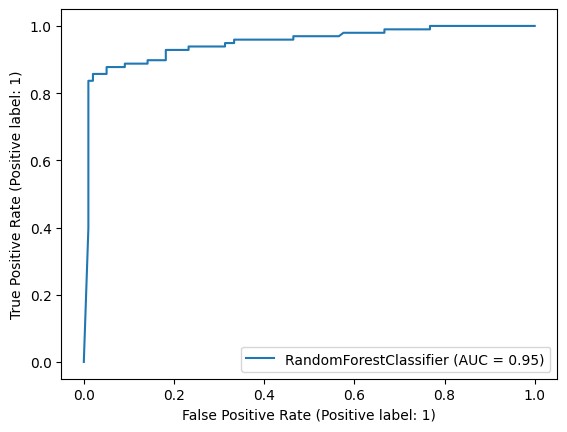

In [126]:
model2 = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='auto', min_samples_leaf=5, min_samples_split=5, n_estimators=50)
rf1 = model2_bert.fit(X_train, Y_train)    
y_hat = rf1.predict(X_test)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf1, X_test, Y_test, ax=ax)
plt.show()

In [127]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(training_data_accuracy)

0.9263024142312579


In [128]:
scaler  = StandardScaler()

In [129]:
scaler.fit(X)


StandardScaler()

In [130]:
standardized_data = scaler.transform(X)


In [131]:
input_data = (-0.751324, 0.610692, 1.105563, -1.149635, 1.050886, 41.94)
#changing the input_data to numpy array
input_data_as_numpy_array =  np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print("it is fraud")


[[ 0.28156151 -0.34771026  0.73588057 -1.0715992   0.63414579 -0.26397352]]
[0]


C:\Users\H_7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\H_7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [110]:
import pickle

In [92]:
pickle.dump(model2_bert,open('RandomForestClassifier.pkl', 'wb'))
pickle.dump(data,open('df.pkl','wb'))